Pegando os dados do imdb, esses dados podem se pegos no site https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr/data

In [12]:
import pandas as pd
resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [13]:
print("negativa \n")
print(resenha.text_pt[189])

negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


verificando se esta balanceada

In [14]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


Alterando o termo negativo e positivo para 0 e 1, para ficar fácil de ensinar a máquina

In [16]:
classificacao = resenha["sentiment"].replace(["neg","pos"], [0,1])

C:\Users\erick\AppData\Local\Temp\ipykernel_26316\3657852121.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha["sentiment"].replace(["neg","pos"], [0,1])


Criar uma coluna chamada classificação e colocar os dados da classificacao em 0 e 1 lá

In [24]:
resenha["classificacao"] = classificacao

In [25]:
resenha.head() #os primeiros 5 itens da lista

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [26]:
resenha.tail() #últimos 5 itens da lista

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


Criando o bag of world / sacola de palavras / vocabulário 

o CountVectorizer ele vetoriza o texto, separando os por palavras, abaixo um exemplo do uso

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo","Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

Mostrar as palavras que foram pegas do texto

In [28]:
feature_names = vetorizar.get_feature_names_out()
print(feature_names)

['Assisti' 'filme' 'ruim' 'um' 'ótimo']


In [23]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

Pegando os dados da bag of words e colocando para visualização numa matriz esparsa

In [18]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                     columns=feature_names)

In [19]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


Criando agora a bag of worlds das resenhas do imdb
o max_features limita a quantidade de palavras para a bag of words

In [20]:
vetorizar = CountVectorizer(lowercase=False, max_features=50) 
bag_of_words = vetorizar.fit_transform(resenha.text_pt)

Mostrando a quantidade de palavras usando o .shape

In [30]:
print(bag_of_words.shape)

(2, 5)


Divindido os dados em TREINO e TESTE

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)  #vetorizando as palavras, pegando as 50 mais frequentes
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto]) #criando a sacola de palavras
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressaoLogistica = LogisticRegression(solver='lbfgs')
    regressaoLogistica.fit(treino, classe_treino)
    return regressaoLogistica.score(teste, classe_teste)

Treinando o modelo, o resultado é a acurácia

In [31]:
classificar_texto(resenha, "text_pt", "classificacao")

0.6583097452486858

Pegando as palavras mais frequentes e criando uma imagem (nuvem de palavras) com essas imagens, dando destaque para as que mais aparecem

In [34]:
%matplotlib inline 
# matplotlib inline é para informar que a imagem gerada ficara no notebook

from wordcloud import WordCloud

todas_palavras = ''.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud(width=800,height=500,
                           max_font_size = 110,
                           collocations=False,
                           background_color="white").generate(todas_palavras)

mostrando a imagem gerada pelo wordcloud

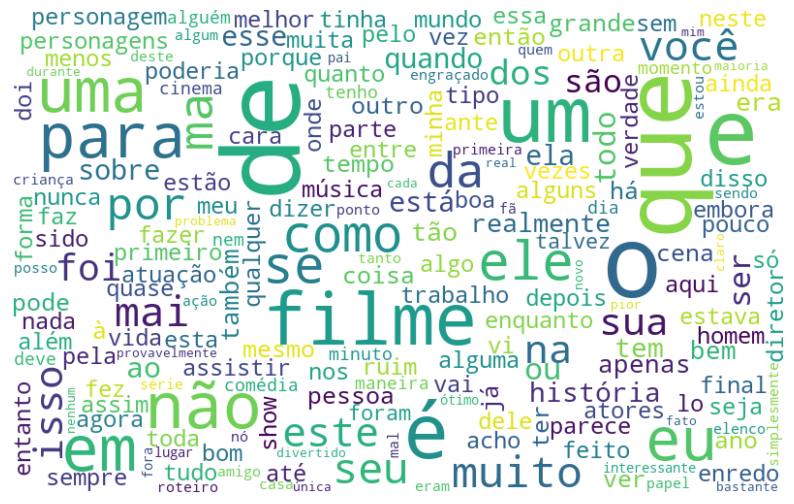

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")  #retirar as legendas da imagem, lateral e inferior
plt.show()

In [35]:
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


Criando agora uma só com as palavras negativas

In [36]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ''.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800,height=500,
                               max_font_size = 110,
                               collocations=False,
                               background_color="white").generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")  #retirar as legendas da imagem, lateral e inferior
    plt.show()

Agora criando com as palavras positivas

In [37]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ''.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800,height=500,
                               max_font_size = 110,
                               collocations=False,
                               background_color="white").generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")  #retirar as legendas da imagem, lateral e inferior
    plt.show()

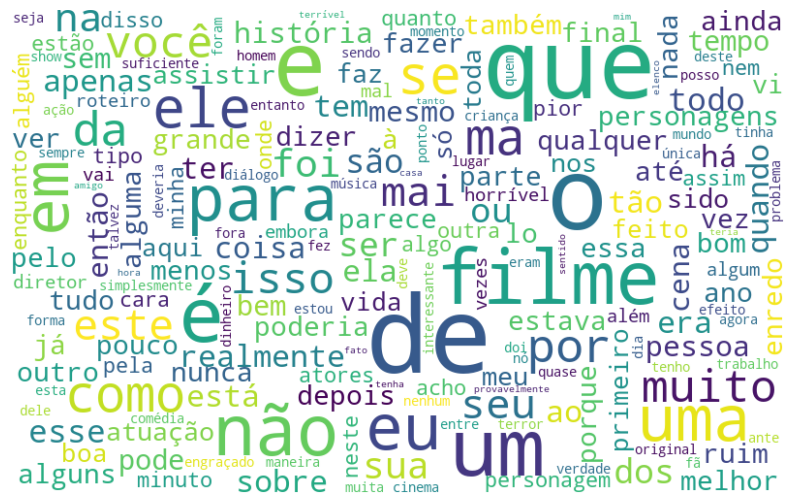

In [38]:
nuvem_palavras_neg(resenha, "text_pt")

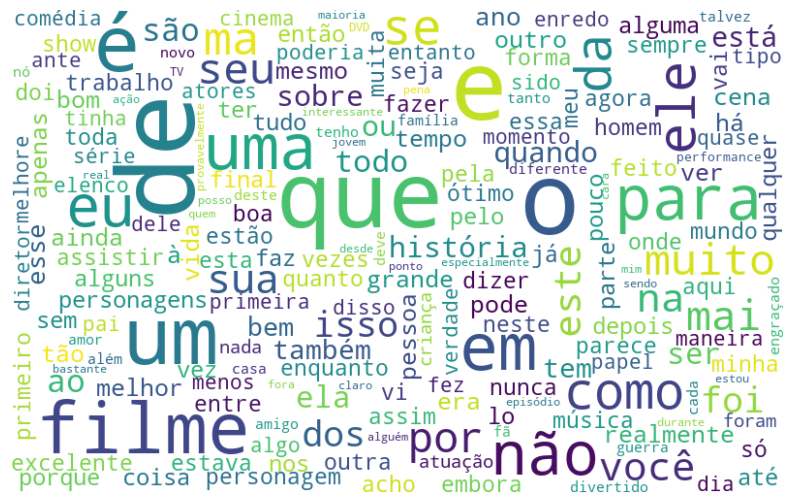

In [39]:
nuvem_palavras_pos(resenha, "text_pt")

Instalando a biblioteca NLTK, muito importante e muito usada no processamento de linguagem natural

a função FreqDist() ela mostra a frequencia de palavras e frases em uma lista

In [40]:
import nltk
frase = ["um filme ruim","um filme bom"]
frequencia = nltk.FreqDist(frase) #calcula a frequencia de palavras
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

a biblioteca tokenize é resposanvel por separar o texto em tokens, transformar um texto em lista separando por palavras, no caso abaixo, separamos por espaços em branco, usando a WhiteSpaceTokenizer() e logo em seguida usando o tokenize para separar conforme o metodo que usamos, é bem parecido com o .join do python também

In [41]:
from nltk import tokenize
frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

print(frequencia)

<FreqDist with 2 samples and 2 outcomes>


aplicando tudo isso no nosso bag_of_worlds, na variavel todas_palavras

In [42]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

Transformando em tabela usando o pandas DataFrame

In [43]:
dt_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()),
                                   "Frequencia":list(frequencia.values())})
dt_frequencia

,Palavra,Frequencia
0,Mais,1469
1,uma,130883
2,"vez,",1927
3,o,244836
4,Sr.,1738
...,...,...
379921,"Muppified,",1
379922,inventora,1
379923,"""Union",1
379924,beirar,1


o .nlargest mostra os dados em ordem descrente, ou seja do maior para o menor, facilita a interpretação 

In [44]:
dt_frequencia.head().nlargest(columns = "Frequencia", n = 10)

,Palavra,Frequencia
3,o,244836
1,uma,130883
2,"vez,",1927
4,Sr.,1738
0,Mais,1469


Função para criar um gráfico de Pareto

In [45]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ''.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    dt_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()),
                                   "Frequencia":list(frequencia.values())})
    
    df_frequencia = dt_frequencia.nlargest(columns = "Frequencia", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, 
                     x = "Palavra", y = "Frequencia", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()
    


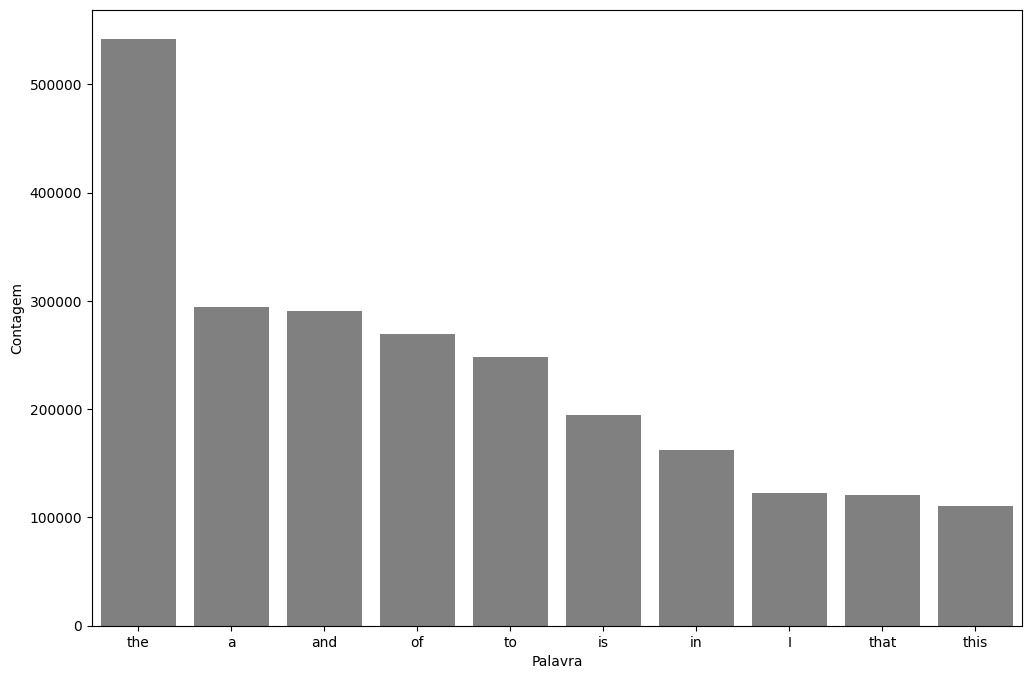

In [46]:
pareto(resenha,"text_en",10)

Removendo as palavras irrelevantes, palavras que não agregam em nada na analise de sentimento, palavras como "de, para, um e etc", essas palavras são chamadas de stopwords, e já existe uma funcionalidade pronta para mexer com elas, que é uma função da biblioteca nltk

In [47]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

Fazendo agora mais um tratamento, retriando as stopwords (frases irrelevantes) e criando uma nova tabela no nosso banco de dados com tratamento_1 onde vai ter as novas frases sem as stopwords

In [48]:
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_1'] = frase_processada

In [49]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


mostrando a wordcloud sem as stopwords

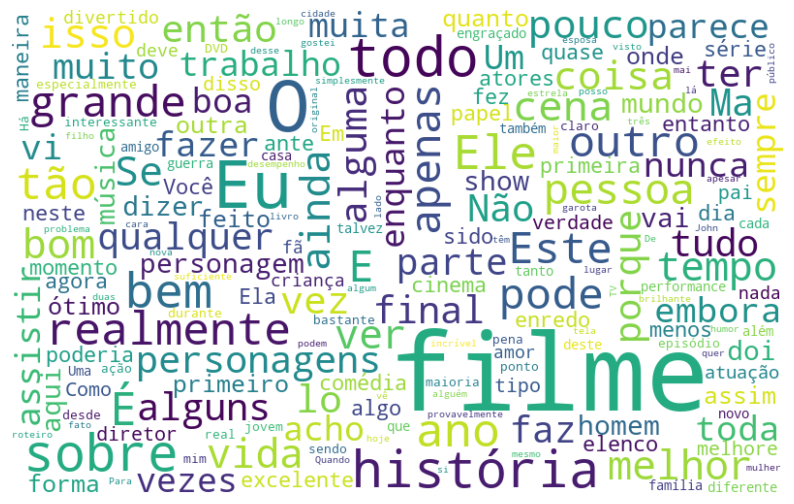

In [50]:
nuvem_palavras_pos(resenha, "tratamento_1")

treinando com esses dados mais tratados, o resultado que sai no console é a ACURÁCIA. OBS: foi percetivel um aumento de 0.03

In [91]:
acuracia_tratamento1 = classificar_texto(resenha,"tratamento_1","classificacao")

In [92]:
print(acuracia_tratamento1)

0.6810351799433886


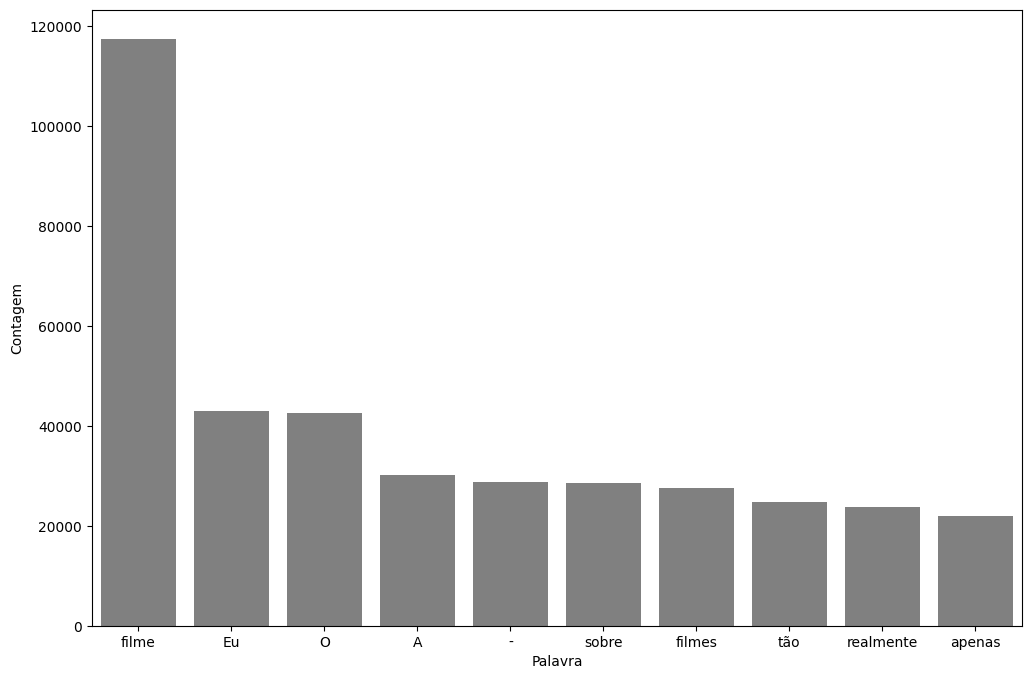

In [52]:
pareto(resenha, "tratamento_1", 10)

Agora aqui é aplicando o tokenize WordPunct para remover os simbolos e sinais, como "! , . % e etc)

In [53]:
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = tokenize.WhitespaceTokenizer()

Aqui estou removendo as pontuações do texto e criando uma nova tabela no nosso banco de dados com os resumos tratados sem pontuação, na tabela tratamento_2

In [57]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_2"] = frase_processada

In [55]:
print(pontuacao)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [58]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


Verificando a acuracia após o tratamento 2

In [89]:
acuracia_tratamento2 = classificar_texto(resenha,"tratamento_2","classificacao")

In [90]:
print(acuracia_tratamento2)

0.6892033966841893


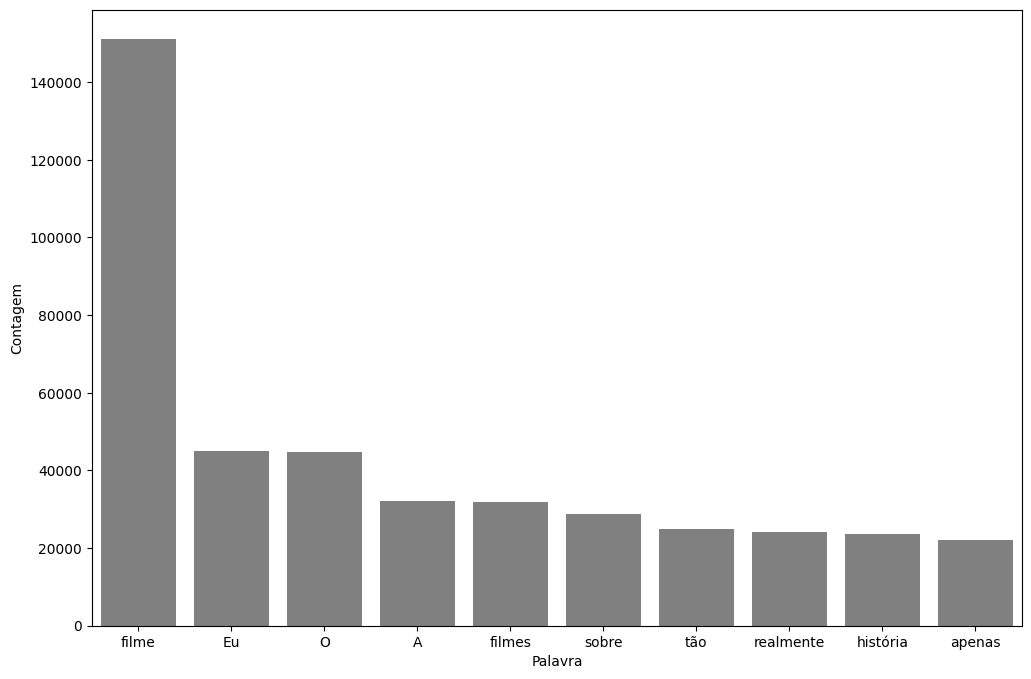

In [59]:
pareto(resenha,"tratamento_2",10)

Removendo acentuação das palavras

In [62]:
import unidecode   

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


aplicando agora isso no texto da resenha, removendo toda a acentuação das palavras

In [65]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

criando stopword sem acento

In [66]:
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

Aqui estou removendo as acentuações do texto e criando uma nova tabela no nosso banco de dados com os resumos tratados sem acentuação, na tabela tratamento_3

In [82]:
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha["tratamento_3"] = frase_processada

In [84]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


Agora verificando a acuracia após esse tratamento da acentuação

In [85]:
acuracia_tratamento3 = classificar_texto(resenha,"tratamento_3","classificacao")

In [96]:
print("tratamento 1: {}".format(acuracia_tratamento1))
print("tratamento 2: {}".format(acuracia_tratamento2))
print("tratamento 3: {}".format(acuracia_tratamento3))

tratamento 1: 0.6810351799433886
tratamento 2: 0.6892033966841893
tratamento 3: 0.6887990295188031


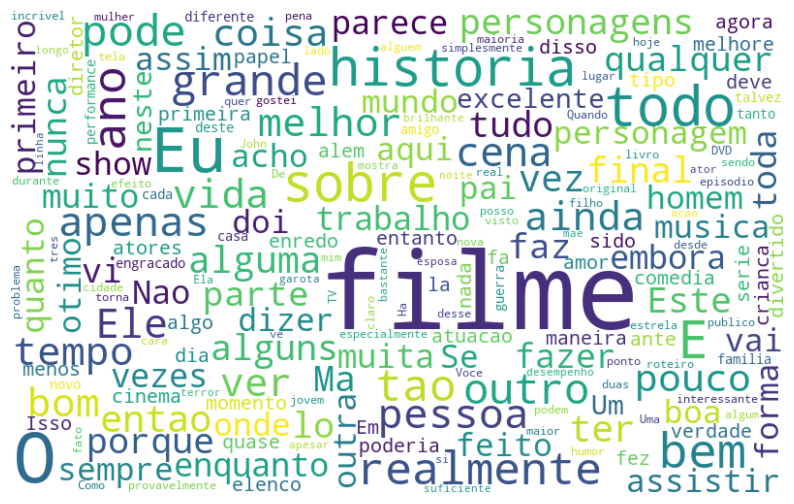

In [98]:
nuvem_palavras_pos(resenha,"tratamento_3")

Iremos agora para o nosso quarto tratamento que é transformar todas as palavras em minuscula, pois ele difere letras maiusculas de minusculas

In [120]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha["tratamento_4"] = frase_processada

In [116]:
acuracia_tratamento4 = classificar_texto(resenha,"tratamento_4","classificacao")

In [122]:
def verifica_acuracia_tratamentos(tam):
    for a in range(tam): 
        print("tratamento {}: {}".format(a+1,classificar_texto(resenha,"tratamento_"+str(a+1),"classificacao")))

verifica_acuracia_tratamentos(4)

tratamento 1: 0.6810351799433886
tratamento 2: 0.6892033966841893
tratamento 3: 0.6887990295188031
tratamento 4: 0.6910634856449657


Agora vamos para o nosso quinto tratamento que é tirar o sufixo das frases, deixando apenas o radical, por exemplo:

Aqui a baixo, temos a função RSLP da NLTK que transforma a palavra em seu radical, como por exemplo:
Corr = Correr, Corrida, Corra, Correm, Correria

In [118]:
stremer = nltk.RSLPStemmer()
stremer.stem("correria")

'corr'

Aplicando isso agora ao nosso banco de dados, criando a tabela tratamento_5 com as palavras apenas com os radicais, tirando os sufixos que só geram palavras novas, porém com o mesmo significado.

In [121]:
frase_processada = list()
for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(stremer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
resenha["tratamento_5"] = frase_processada

Aqui vemos a evolução da acurácia desde o primeiro tratamento, teve um crescimentozin kk

In [123]:
verifica_acuracia_tratamentos(5)

tratamento 1: 0.6810351799433886
tratamento 2: 0.6892033966841893
tratamento 3: 0.6887990295188031
tratamento 4: 0.6910634856449657
tratamento 5: 0.7010917913465426


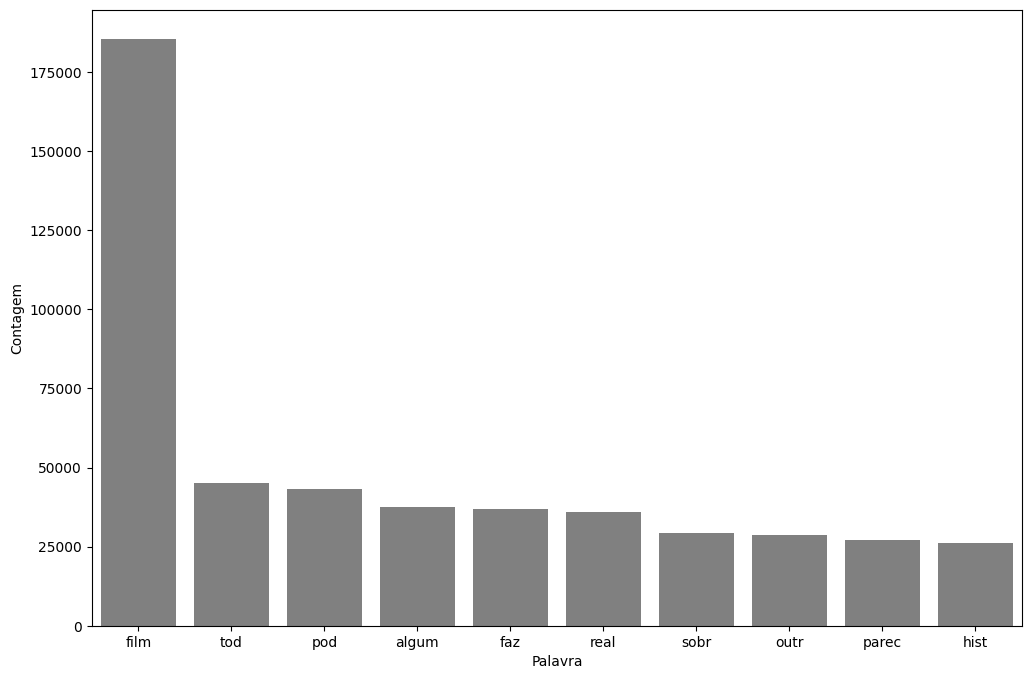

In [124]:
pareto(resenha,"tratamento_5",10)